In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import torch
import pickle

## Time-dependent, no periodic component

In [31]:
# from utils.train_synthetic import train_conformal_forecaster
time_dependent_results = train_conformal_forecaster(noise_mode='time-dependent')

**Joint coverage**

In [32]:
for result in time_dependent_results:
    print('{:.1f}\\%'.format(result['Mean joint coverage'] * 100))

92.0\%
91.6\%
92.0\%
92.2\%
91.2\%


**Independent coverage**

In [33]:
for result in time_dependent_results:
    independent_coverages = result['Mean independent coverage']
    print(independent_coverages)
#     print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(independent_coverages.mean() * 100, independent_coverages.std() * 100))
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

tensor([0.9600, 0.9840, 0.9820, 0.9940, 0.9820])
[96.0\%, 99.4\%]

tensor([0.9840, 0.9880, 0.9840, 0.9560, 0.9840])
[95.6\%, 98.8\%]

tensor([0.9820, 0.9820, 0.9720, 0.9760, 0.9780])
[97.2\%, 98.2\%]

tensor([0.9800, 0.9800, 0.9740, 0.9920, 0.9840])
[97.4\%, 99.2\%]

tensor([0.9780, 0.9800, 0.9900, 0.9780, 0.9800])
[97.8\%, 99.0\%]



**Mean absolute error**

In [34]:
for result in time_dependent_results:
    errors = result['Errors']
    print(errors.mean(axis=0)) 
#     print(errors.mean())
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

tensor([2.3385, 3.1437, 3.7521, 4.0304, 4.2055], grad_fn=<MeanBackward1>)
3.49 \(\pm\) 2.69

tensor([2.8506, 3.5456, 4.1636, 4.6017, 4.7974], grad_fn=<MeanBackward1>)
3.99 \(\pm\) 3.13

tensor([3.9038, 4.5945, 5.0242, 5.6742, 5.4950], grad_fn=<MeanBackward1>)
4.94 \(\pm\) 3.79

tensor([4.3761, 5.1412, 6.1135, 5.9675, 6.7823], grad_fn=<MeanBackward1>)
5.68 \(\pm\) 4.35

tensor([5.4778, 6.2312, 7.0181, 7.4857, 7.7957], grad_fn=<MeanBackward1>)
6.80 \(\pm\) 5.33



**Interval widths**

In [35]:
for result in time_dependent_results:
    print(result['Mean confidence interval widths'])
    print(result['Mean confidence interval widths'].mean(), result['Mean confidence interval widths'].std())
    print()

tensor([12.8132, 17.8813, 21.2491, 23.2933, 23.6637], requires_grad=True)
tensor(19.7801, grad_fn=<MeanBackward0>) tensor(4.5201, grad_fn=<StdBackward0>)

tensor([17.1109, 20.6710, 22.1549, 23.8422, 27.9436], requires_grad=True)
tensor(22.3445, grad_fn=<MeanBackward0>) tensor(3.9944, grad_fn=<StdBackward0>)

tensor([22.0895, 25.7180, 28.0620, 32.3142, 33.7863], requires_grad=True)
tensor(28.3940, grad_fn=<MeanBackward0>) tensor(4.7818, grad_fn=<StdBackward0>)

tensor([25.1534, 29.1088, 32.5214, 39.1727, 41.6589], requires_grad=True)
tensor(33.5230, grad_fn=<MeanBackward0>) tensor(6.8675, grad_fn=<StdBackward0>)

tensor([31.4864, 34.9797, 43.5343, 42.1337, 47.7705], requires_grad=True)
tensor(39.9809, grad_fn=<MeanBackward0>) tensor(6.6164, grad_fn=<StdBackward0>)



## Static noise, no periodic component

In [15]:
static_results = train_conformal_forecaster(noise_mode='static')

**Joint coverage**

In [16]:
for result in static_results:
    print('{:.1f}\\%'.format(result['Mean joint coverage'] * 100))

95.0\%
94.4\%
93.2\%
93.4\%
92.4\%


**Independent coverage**

In [17]:
for result in static_results:
    independent_coverages = result['Mean independent coverage']
    print(independent_coverages)
#     print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(independent_coverages.mean() * 100, independent_coverages.std() * 100))
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

tensor([0.9780, 0.9860, 0.9860, 0.9780, 0.9800])
[97.8\%, 98.6\%]

tensor([0.9840, 0.9780, 0.9820, 0.9840, 0.9840])
[97.8\%, 98.4\%]

tensor([0.9720, 0.9800, 0.9780, 0.9760, 0.9800])
[97.2\%, 98.0\%]

tensor([0.9820, 0.9840, 0.9720, 0.9640, 0.9680])
[96.4\%, 98.4\%]

tensor([0.9780, 0.9680, 0.9780, 0.9720, 0.9760])
[96.8\%, 97.8\%]



**Mean absolute error**

In [18]:
for result in static_results:
    errors = result['Errors']
    print(errors.mean(axis=0)) 
#     print(errors.mean())
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

tensor([1.8995, 2.5804, 3.1298, 3.5363, 3.7695], grad_fn=<MeanBackward1>)
2.98 \(\pm\) 2.41

tensor([1.9419, 2.7828, 3.3485, 3.6435, 3.9276], grad_fn=<MeanBackward1>)
3.13 \(\pm\) 2.48

tensor([1.9291, 2.7528, 3.5822, 4.0033, 4.2119], grad_fn=<MeanBackward1>)
3.30 \(\pm\) 2.68

tensor([2.0626, 2.7283, 3.1654, 3.6567, 3.9644], grad_fn=<MeanBackward1>)
3.12 \(\pm\) 2.52

tensor([1.9955, 2.6569, 3.4058, 3.6974, 3.8686], grad_fn=<MeanBackward1>)
3.12 \(\pm\) 2.54



**Interval widths**

In [19]:
for result in static_results:
    print(result['Mean confidence interval widths'])
    print(result['Mean confidence interval widths'].mean(), result['Mean confidence interval widths'].std())
    print()

tensor([11.4507, 15.3996, 19.2507, 21.0733, 22.1902], requires_grad=True)
tensor(17.8729, grad_fn=<MeanBackward0>) tensor(4.4199, grad_fn=<StdBackward0>)

tensor([12.1119, 16.7439, 18.5749, 21.4060, 23.3589], requires_grad=True)
tensor(18.4391, grad_fn=<MeanBackward0>) tensor(4.3570, grad_fn=<StdBackward0>)

tensor([11.4600, 16.2007, 19.3880, 23.0490, 23.6155], requires_grad=True)
tensor(18.7427, grad_fn=<MeanBackward0>) tensor(5.0548, grad_fn=<StdBackward0>)

tensor([11.7586, 16.4172, 18.6265, 20.4468, 23.1094], requires_grad=True)
tensor(18.0717, grad_fn=<MeanBackward0>) tensor(4.2988, grad_fn=<StdBackward0>)

tensor([11.1144, 15.1959, 18.9498, 20.8329, 22.0748], requires_grad=True)
tensor(17.6336, grad_fn=<MeanBackward0>) tensor(4.4759, grad_fn=<StdBackward0>)



## Periodic component, time dependent noise

In [158]:
periodic_results = train_conformal_forecaster(noise_mode='periodic')

**Joint coverage**

In [159]:
for result in periodic_results:
    print('{:.1f}\\%'.format(result['Mean joint coverage'] * 100))

94.4\%
93.0\%


**Independent coverage**

In [160]:
for result in periodic_results:
    independent_coverages = result['Mean independent coverage']
    print(independent_coverages)
#     print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(independent_coverages.mean() * 100, independent_coverages.std() * 100))
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

tensor([0.9900, 0.9920, 0.9900, 0.9800, 0.9940, 0.9800, 0.9920, 0.9840, 0.9900,
        0.9880])
[98.0\%, 99.4\%]

tensor([0.9940, 0.9960, 0.9880, 0.9820, 0.9820, 0.9880, 0.9900, 0.9940, 0.9800,
        0.9900])
[98.0\%, 99.6\%]



**Mean absolute error**

In [161]:
for result in periodic_results:
    errors = result['Errors']
    print(errors.mean(axis=0)) 
#     print(errors.mean())
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

tensor([ 7.1017,  7.1336,  9.1060,  9.7436, 10.8817, 11.7779, 12.8745, 13.3424,
        14.6040, 14.6704], grad_fn=<MeanBackward1>)
11.12 \(\pm\) 9.42

tensor([ 8.0780, 10.8483, 12.7975, 12.4866, 12.4846, 13.3862, 14.0606, 14.4793,
        14.3295, 14.8086], grad_fn=<MeanBackward1>)
12.78 \(\pm\) 9.95



**Interval widths**

In [162]:
for result in periodic_results:
    print(result['Mean confidence interval widths'])
    print(result['Mean confidence interval widths'].mean(), result['Mean confidence interval widths'].std())
    print()

tensor([50.6244, 53.6450, 67.4296, 61.9072, 77.1742, 73.2698, 88.7495, 90.1940,
        99.7400, 99.4827], requires_grad=True)
tensor(76.2216, grad_fn=<MeanBackward0>) tensor(17.9602, grad_fn=<StdBackward0>)

tensor([ 58.1606,  80.7202,  87.3097,  75.0322,  74.2798,  81.7930,  92.1664,
        100.0012,  87.9910,  92.0041], requires_grad=True)
tensor(82.9458, grad_fn=<MeanBackward0>) tensor(11.8358, grad_fn=<StdBackward0>)



## Plotting

In [38]:
import pickle

In [151]:
def plot_timeseries(noise_mode, baseline, index=None, forecast_only=False, figsize=(28,4), figure_name=None):
     
    plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
    plt.rcParams.update({'axes.titlesize': 16})
    
    datasets = []
    for i in ([2, 10] if noise_mode == 'periodic' else range(1, 6)):
        with open('processed_data/synthetic_{}_raw_{}.pkl'.format(noise_mode, i), 'rb') as f:
            datasets.append(pickle.load(f))
        
    with open('saved_results/{}_{}.pkl'.format(noise_mode, baseline), 'rb') as f:
        all_results = pickle.load(f)
        
    fig, axs = plt.subplots(nrows=1, ncols=len(datasets), figsize=figsize, sharey=True)

    for j, ax in enumerate(axs.flat):
        _, _, dataset = datasets[j]
        results = all_results[j]
        
        X, Y = dataset
            
        if index is None:
            index = range(len(X))
        i = np.random.choice(index)

        
        # Derive unpadded sequences and targets
        sequence, target = X[i], Y[i]
        
        horizon = len(target)
        length = len(sequence)
        
        if not forecast_only:
            # (Scatter)plot of the time series
            ax.plot(range(1, length+1), sequence, color="black")
            
            # Prediction start vertical
            ax.axvline(length, linestyle="--", color="black")
        
        ax.scatter(range(length + 1, length + horizon + 1), target, color="black")
        
        # Interval boundaries
        upper_limit = results['Upper limit']
        lower_limit = results['Lower limit']
        
        lower = [sequence[-1].item()] + lower_limit[i].flatten().tolist()
        upper = [sequence[-1].item()] + upper_limit[i].flatten().tolist()
        preds = [sequence[-1].item()] + results['Point predictions'][i].flatten().tolist()

        ax.fill_between(range(length, length + horizon + 1), lower, upper, color="r", alpha=0.25)
        ax.plot(range(length, length + horizon + 1), lower, linestyle="--", color="r")
        ax.plot(range(length, length + horizon + 1), upper, linestyle="--", color="r")
        ax.plot(range(length, length + horizon + 1), preds, linestyle="--", linewidth=3, color="r")

#         if j == 0:
#             ax.set(ylabel='Prediction')  
        ax.set(xlabel='Time step')
        if noise_mode == 'time-dependent':
            ax.set(title='$\sigma_t^2 =${:.1f}$t$'.format((j+1)*0.1))
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)
    
#     plt.xlabel('Time step')
#     plt.ylabel('Prediction')
    if figure_name is not None:
        plt.savefig('{}.png'.format(figure_name) , bbox_inches='tight')
    plt.show()

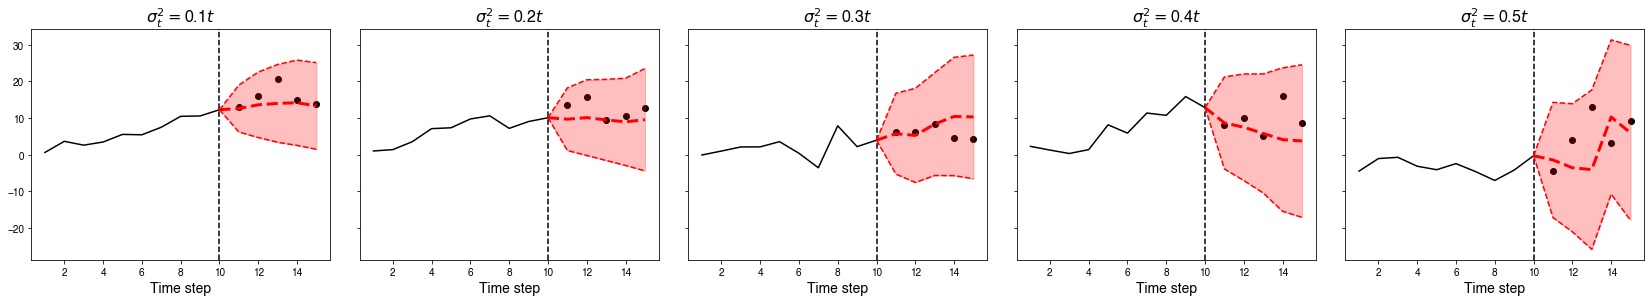

In [152]:
plot_timeseries(noise_mode='time-dependent', baseline='CPRNN', figure_name='time-dependent')

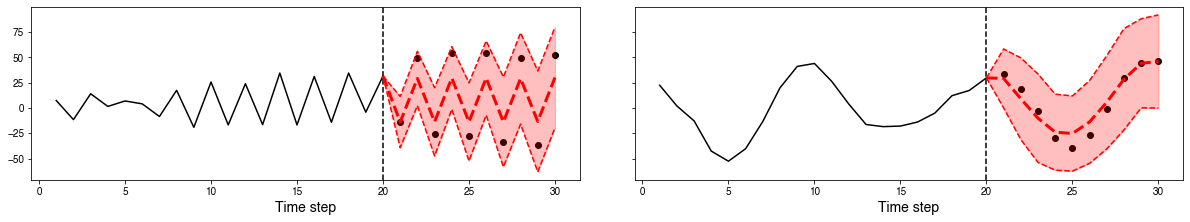

In [173]:
plot_timeseries(noise_mode='periodic', baseline='CPRNN', figsize=(20,3), figure_name='periodic')